In [ ]:
Assignment 3 
Name - Anjali Rana
Group - 3CS5 
Roll no - 102017095

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 

## **1. K fold cross validadation**

In [2]:
df = pd.read_csv('../input/us-housing/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


### **a) Divide the dataset into input features (all columns except price) and output variable (price)** 

In [3]:
x = df.drop(['Price'],axis = 1)
y = df['Price']
cols = x.columns

### **b) Scale the values of input features**

In [4]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x))
x.columns = cols
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387


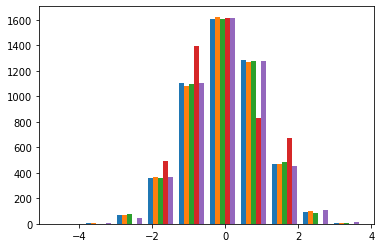

In [5]:
plt.hist(x)
plt.show()

### **c) Divide input and output features into five folds**

In [6]:
index = []
for i in range(6):
    index.append(1000*i)

for i in range(len(index)-1):
    print(len(x.loc[index[i]:index[i+1]-1]))
print(f"Index values : {index}")

1000
1000
1000
1000
1000
Index values : [0, 1000, 2000, 3000, 4000, 5000]


### **d) Run five iterations, in each iteration consider one-fold as test set and remaining four sets as training set**

In [7]:
best_score = 0
for i in range(5):
    test_x = x.loc[index[i]:index[i+1]-1]
    test_y = y.loc[index[i]:index[i+1]-1]
    train_x = x.loc[0:index[i]-1]
    train_x = train_x.append(x.loc[index[i+1]:4999])
    train_y = y.loc[0:index[i]-1]
    train_y = train_y.append(y.loc[index[i+1]:4999])
    
    # creating X matrix
    X = np.insert(train_x.values,0,1,axis=1)
    test_X = np.insert(test_x.values,0,1,axis=1)
    Y = train_y.values
    
    #least square error fit
    XTX = np.matmul(X.transpose(),X)
    inv = np.linalg.inv(XTX)
    B = np.matmul(np.matmul(inv,X.transpose()),Y)
    
    #predicting values
    predicted = np.matmul(test_X,B)

    #calculating error
    error = test_y.values-predicted
    mean = test_y.values - np.mean(test_y.values)
    rss = 0
    tss = 0
    for j in range(len(error)):
        rss += error[i]**2
        tss += mean[i]**2
    r2 = 1-rss/tss
#     print(r2)
    score = r2_score(predicted,test_y.values)
    print(score)
    
    if(score>best_score):
        best_score = score
        best_B = B
    
    #storing best value of B matrix

0.9114306937969592
0.9120746724600814
0.9087184386642989
0.9130861878013949
0.9059402234142091


### **e) Use the best value of (𝛽) matrix (for which R2_score is maximum)**

In [8]:
best_score

0.9130861878013949

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
ones = []
for j in range(x_test.shape[0]):
    ones.append([1])
x_test = np.append(ones,x_test,axis=1)
predicted = np.matmul(x_test,B)
r2_score(predicted,y_test)

0.9104766780072718

## **2. Gradient Descend optimisation**

In [10]:
#splitting the data
x_train_val,x_test,y_train_val,y_test = train_test_split(x,y,test_size = 0.30)
x_train,x_val,y_train,y_val = train_test_split(x_train_val,y_train_val,test_size = 0.14/0.70)

In [11]:
A = [0.001,0.01,0.1,1]

In [12]:
train_ones = []
val_ones = []
test_ones = []

for i in range(x_train.shape[0]):
    train_ones.append([1])
for i in range(x_val.shape[0]):
    val_ones.append([1])
for i in range(x_test.shape[0]):
    test_ones.append([1])
    

X_train = np.append(train_ones,x_train,axis=1)
X_val = np.append(val_ones,x_val,axis=1)
X_test = np.append(test_ones,x_test,axis=1)

Y_train = y_train.values
Y_val = y_val.values
Y_test = y_test.values

B = []
for i in range(len(A)):
    B.append([0,0,0,0,0,0])

In [13]:
# n = x_train.shape[0]
# print("started")
# for p in range(len(A)):
#     print("in loop p\n")
#     b = B[p]
#     a = A[p]
#     for k in range(1000):
    
#         for j in range(len(b)):
#             s = 0
            
#             for i in range(x_train.shape[0]):
#                 X = np.append(1,X_train[i])
#                 fx = np.dot(b[j],X)
#                 s += (fx-Y_train[i])*(X[j])
#             b[j] = b[j] - a*s/n
#         B[p] = b

In [14]:
n = x_train.shape[0]
X = X_train
Y = Y_train
L = []

for p in range(X_train.shape[1]):
    L.append(X_train[:,p])
    
for p in range(len(A)):
    for k in range(1000):
        Q = np.matmul(X,B[p]) - Y
        temp = []
        for i in range(6):
            S = np.dot(L[i],Q)
            temp.append(B[p][i] - A[p]*S/n)
        B[p] = temp

In [15]:
B

[[777033.6017971002,
  145535.23964308147,
  91202.08596391256,
  74063.94505128836,
  22625.501744704026,
  94836.02440995535],
 [1230096.0283401278,
  230059.7476339712,
  164431.7811412102,
  121194.01820843478,
  -58.84514561721913,
  150620.6398861292],
 [1230148.44970495,
  230086.81943953934,
  164465.43883600098,
  121469.89045424676,
  -347.8909664242434,
  150623.58507743603],
 [1230148.449704949,
  230086.81943953948,
  164465.4388360011,
  121469.89045424687,
  -347.89096642429286,
  150623.5850774359]]

In [16]:
r2_val = []
r2_test = []
for i in range(len(B)):
    predict_val = np.matmul(X_val,B[i])
    predict_test = np.matmul(X_test,B[i])
    r2_val.append(r2_score(predict_val,Y_val))
    r2_test.append(r2_score(predict_test,Y_test))


In [17]:
r2_test

[-4.272496402484942,
 0.9144692300063804,
 0.9145032044498436,
 0.9145032044498436]

In [18]:
r2 = r2_test + r2_val
b2 = B + B
print(max(r2))

for i in range(len(r2)):
    if (r2[i]==max(r2)):
        optimalB = B[i]
optimalB

0.9145032044498436


[1230148.449704949,
 230086.81943953948,
 164465.4388360011,
 121469.89045424687,
 -347.89096642429286,
 150623.5850774359]

This is the best value of regression coefficient

## **3) Pre-processing and Multiple Linear Regression**

In [19]:
cols = ["symboling", "normalized_losses",
"make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels",
"engine_location", "wheel_base", "length", "width", "height", "curb_weight",
"engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
"compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]

car = pd.read_csv('../input/ucmachinelearning/imports-85.data')
car.columns = cols

In [20]:
car.replace('?',np.nan,inplace = True)
car

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


### **Converting non-numeric values to numeric values**

In [21]:
door = set(car['num_doors'].values)
cylinders = set(car['num_cylinders'].values)
print(f"Doors : {door}\nCylinders = {cylinders}")

Doors : {nan, 'four', 'two'}
Cylinders = {'two', 'eight', 'four', 'six', 'twelve', 'five', 'three'}


In [22]:
car['num_doors'].replace(list(door),[np.nan,2,4],inplace=True)
car['num_cylinders'].replace(list(cylinders),[4,5,12,8,2,3,6],inplace=True)

In [23]:
encoder = OneHotEncoder()
enc_data = pd.DataFrame(encoder.fit_transform(car[['body_style','drive_wheels']]).toarray())
car = car.join(enc_data)
car.drop(['body_style','drive_wheels'],axis=1,inplace = True)

In [24]:
encoder = LabelEncoder()
cols = ['make', 'aspiration', 'engine_location','fuel_type' ]
for i in cols:
    car[i] = encoder.fit_transform(car[i])

In [25]:
fuel = set(car['fuel_system'].values)
engine = set(car['engine_type'].values)
print(f"fuel_type : {fuel}\nengine_type : {engine}")

fuel_type : {'mfi', '1bbl', 'idi', 'spdi', '4bbl', 'spfi', '2bbl', 'mpfi'}
engine_type : {'l', 'ohc', 'rotor', 'dohc', 'ohcv', 'dohcv', 'ohcf'}


In [26]:
car['fuel_system'].replace(list(fuel),[0,0,0,0,0,0,0,1],inplace=True)
car['engine_type'].replace(list(engine),[0,0,1,0,0,0,0],inplace=True)

In [27]:
car

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,...,highway_mpg,price,0,1,2,3,4,5,6,7
0,3,NaN,0,1,0,4.0,0,88.6,168.8,64.1,...,27,16500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,NaN,0,1,0,4.0,0,94.5,171.2,65.5,...,26,16500,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,2,164,1,1,0,2.0,0,99.8,176.6,66.2,...,30,13950,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,2,164,1,1,0,2.0,0,99.4,176.6,66.4,...,22,17450,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,2,NaN,1,1,0,4.0,0,99.8,177.3,66.3,...,25,15250,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,21,1,0,2.0,0,109.1,188.8,68.9,...,28,16845,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
200,-1,95,21,1,1,2.0,0,109.1,188.8,68.8,...,25,19045,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
201,-1,95,21,1,0,2.0,0,109.1,188.8,68.9,...,23,21485,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
202,-1,95,21,0,1,2.0,0,109.1,188.8,68.9,...,27,22470,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### **Handling missing values**

In [28]:
for col in car.columns:
    car[col] = pd.to_numeric(car[col])

In [29]:
car.dropna(subset = ["price"],inplace = True)
car.fillna(car.median(),inplace=True)

In [30]:
car.isna().sum()

symboling            0
normalized_losses    0
make                 0
fuel_type            0
aspiration           0
num_doors            0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
num_cylinders        0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
0                    0
1                    0
2                    0
3                    0
4                    0
5                    0
6                    0
7                    0
dtype: int64

### **Dividing data into input and output features***

In [31]:
x = car.drop('price',axis=1)
y = car['price']
cols = x.columns

In [32]:
x.shape

(200, 31)

In [33]:
y.shape

(200,)

In [34]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x))
x.columns = cols
x

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,...,city_mpg,highway_mpg,0,1,2,3,4,5,6,7
0,1.742368,-0.178766,-1.996136,0.333333,-0.468521,1.163160,-0.123404,-1.701436,-0.440719,-0.857154,...,-0.654574,-0.544042,6.244998,-0.204124,-0.717741,-0.941697,-0.377964,-0.204124,-1.199593,1.304877
1,0.136499,-0.178766,-1.996136,0.333333,-0.468521,1.163160,-0.123404,-0.721882,-0.245855,-0.189737,...,-0.966276,-0.690882,-0.160128,-0.204124,1.393261,-0.941697,-0.377964,-0.204124,-1.199593,1.304877
2,0.939433,1.347283,-1.834636,0.333333,-0.468521,-0.859727,-0.123404,0.158057,0.192591,0.143971,...,-0.187021,-0.103522,-0.160128,-0.204124,-0.717741,1.061913,-0.377964,-0.204124,0.833616,-0.766356
3,0.939433,1.347283,-1.834636,0.333333,-0.468521,-0.859727,-0.123404,0.091646,0.192591,0.239316,...,-1.122127,-1.278241,-0.160128,-0.204124,-0.717741,1.061913,-0.377964,4.898979,-1.199593,-0.766356
4,0.939433,-0.178766,-1.834636,0.333333,-0.468521,1.163160,-0.123404,0.158057,0.249427,0.191644,...,-0.966276,-0.837722,-0.160128,-0.204124,-0.717741,1.061913,-0.377964,-0.204124,0.833616,-0.766356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-1.469370,-0.801643,1.395357,0.333333,-0.468521,-0.859727,-0.123404,1.702100,1.183155,1.431132,...,-0.342872,-0.397202,-0.160128,-0.204124,-0.717741,1.061913,-0.377964,-0.204124,-1.199593,1.304877
196,-1.469370,-0.801643,1.395357,0.333333,2.134375,-0.859727,-0.123404,1.702100,1.183155,1.383459,...,-0.966276,-0.837722,-0.160128,-0.204124,-0.717741,1.061913,-0.377964,-0.204124,-1.199593,1.304877
197,-1.469370,-0.801643,1.395357,0.333333,-0.468521,-0.859727,-0.123404,1.702100,1.183155,1.431132,...,-1.122127,-1.131402,-0.160128,-0.204124,-0.717741,1.061913,-0.377964,-0.204124,-1.199593,1.304877
198,-1.469370,-0.801643,1.395357,-3.000000,2.134375,-0.859727,-0.123404,1.702100,1.183155,1.431132,...,0.124681,-0.544042,-0.160128,-0.204124,-0.717741,1.061913,-0.377964,-0.204124,-1.199593,1.304877


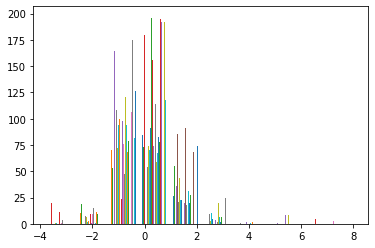

In [35]:
plt.hist(x)
plt.show()

In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)
model = LinearRegression()
model.fit(x_train,y_train)
prediction = model.predict(x_test)
r2_score(prediction,y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


0.8844447312204846

### **Applying PCA**

In [37]:
pca=PCA(0.95)
X_pca=pca.fit_transform(x)
x.shape

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


(200, 31)

In [38]:
X_pca.shape
X_train,X_test,y_train,y_test=train_test_split(X_pca,y,test_size=0.3,random_state=30)

lreg=LinearRegression()
lreg.fit(X_train,y_train)
y_pred=lreg.predict(X_test)
r2_score(y_test,y_pred)

0.8162973033509053